<a href="https://colab.research.google.com/github/gadilshina-ve/BDP_MGPU/blob/main/Lab_work_4/rezult_1_David_Weber__The_Shadow_of_Saganami/Gadilshina_1_DB_MapReduce_3%3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа с данными студента**

In [121]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
# проверка каталога
!ls sample_data

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [9]:
#удаление дубликатов
!rm 90.txt

rm: cannot remove '90.txt': No such file or directory


In [16]:
#загрузка текстов студента в среду
from google.colab import files
uploaded = files.upload()

Saving 90.txt to 90.txt


In [17]:
#объединение  текстов студента в один массив данных

first = True
with open('stud1.txt', 'wt', encoding='utf8') as out:
  all_data = ''.join([open('{}.txt'.format(i), encoding='utf8').read() for i in range(90, 91)]) #
  for line in all_data.split('\n'):
    print(line)
    if 'next' in line:
                         if not first:
                            line = line.replace('next', '')
                         else:
                            first = False
    out.write(line + '\n')


LITRU.RU - Электронная Библиотека

Название книги: Белый вождь
Автор(ы): Рид Томас Майн 
Жанр: Вестерны
Адрес книги: http://www.litru.ru/?book=68848&description=1




---------------------------------------------

  Майн Рид. 
  Белый вождь  
 Северомексиканская легенда 




 Глава I 


 Это случилось в глубине Американского континента, более чем за тысячу миль от обоих океанов. 
 Поднимитесь со мною вон на ту гору и с ее снеговой вершины посмотрите вокруг. 
 Вот мы уже на самом высоком гребне. Что же мы видим? 
 На север, пересекая тридцать параллелей, до самых берегов Северного Ледовитого Океана, тянутся горы. Они беспорядочно громоздятся на юге: цепи их то расходятся, то сплетаются в узел. И на западе тоже горы; их неровные очертания четко вырисовываются в небе, а у подножий раскинулись широкие плоскогорья. 
 А теперь обратимся на восток. Ни одной горной вершины! Ни одной – на сколько хватает глаз и еще на тысячи миль. Вон та темная линия, встающая на горизонте, – это лишь скалисты

In [18]:
filename = 'stud1.txt'
file = open(filename, 'rt')
text1 = file.read()
file.close()
#print(text1)

#убираем гиперсылки
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

#print(remove_urls(text1))
text=remove_urls(text1)
text2=remove_urls(text1)

#Очистка текста Lowering the case, removing punctuations and numbers

#text_clean = text.replace('-', ' ') #replacing hyphens with whitespace
text_clean = text.replace('.', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('’', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(')', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('(', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\n', ' ') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x92', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x94', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\x86', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('№', '') #replacing hyphens with whitespace \t «
text_clean = text_clean.replace('–', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\t', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('«', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(':', '') #replacing hyphens with whitespace
text_clean = text_clean.replace(';', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('*', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('•', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('#', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('»', '') #replacing hyphens with whitespace —
text_clean = text_clean.replace('—', '') #replacing hyphens with whitespace
text_clean = text_clean.replace('\xa0', ' ') #replacing hyphens with whitespace

table=str.maketrans('','',string.punctuation)
text_clean = text_clean.translate(table)

#removing numbers
text_clean = re.sub(r'\d', '', text_clean)

text_lower = text_clean.lower() #lowercasing
#len(text_lower)

text_lower2=text_lower.split(' ')
text_lower2

['',
 'litru',
 'ru',
 '',
 'электронная',
 'библиотека',
 '',
 'название',
 'книги',
 'белый',
 'вождь',
 'авторы',
 'рид',
 'томас',
 'майн',
 '',
 'жанр',
 'вестерны',
 'адрес',
 'книги',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'майн',
 'рид',
 '',
 '',
 '',
 '',
 'белый',
 'вождь',
 '',
 '',
 '',
 'северомексиканская',
 'легенда',
 '',
 '',
 '',
 '',
 '',
 '',
 'глава',
 'i',
 '',
 '',
 '',
 '',
 'это',
 'случилось',
 'в',
 'глубине',
 'американского',
 'континента',
 'более',
 'чем',
 'за',
 'тысячу',
 'миль',
 'от',
 'обоих',
 'океанов',
 '',
 '',
 '',
 'поднимитесь',
 'со',
 'мною',
 'вон',
 'на',
 'ту',
 'гору',
 'и',
 'с',
 'ее',
 'снеговой',
 'вершины',
 'посмотрите',
 'вокруг',
 '',
 '',
 '',
 'вот',
 'мы',
 'уже',
 'на',
 'самом',
 'высоком',
 'гребне',
 '',
 'что',
 'же',
 'мы',
 'видим',
 '',
 '',
 'на',
 'север',
 'пересекая',
 'тридцать',
 'параллелей',
 'до',
 'самых',
 'берегов',
 'северного',
 'ледовитого',
 'океана',
 'тянутся',
 'горы',
 '',
 'они',
 'беспоря

In [19]:
len(text_lower2)

106804

In [20]:
#Токенизация текста
spec_chars = string.punctuation + '\n\xa0«»\t'
text_test = " ".join([ch for ch in text_lower2 if ch not in spec_chars])
#text_test

text_tokens = word_tokenize(text_test)
#text_tokens
#from nltk import word_tokenize
#nltk.download('punkt')
#sentences = [word.lower() for word in text_lower2 if re.match('^[а-яА-ЯёЁ]+', word)]

dftt = pd.DataFrame(text_tokens, columns=['Words'])
dftt = dftt.dropna(subset=['Words'])
#dftt
sentences=dftt['Words'].values.tolist()
text_tokens

['litru',
 'ru',
 'электронная',
 'библиотека',
 'название',
 'книги',
 'белый',
 'вождь',
 'авторы',
 'рид',
 'томас',
 'майн',
 'жанр',
 'вестерны',
 'адрес',
 'книги',
 'майн',
 'рид',
 'белый',
 'вождь',
 'северомексиканская',
 'легенда',
 'глава',
 'i',
 'это',
 'случилось',
 'в',
 'глубине',
 'американского',
 'континента',
 'более',
 'чем',
 'за',
 'тысячу',
 'миль',
 'от',
 'обоих',
 'океанов',
 'поднимитесь',
 'со',
 'мною',
 'вон',
 'на',
 'ту',
 'гору',
 'и',
 'с',
 'ее',
 'снеговой',
 'вершины',
 'посмотрите',
 'вокруг',
 'вот',
 'мы',
 'уже',
 'на',
 'самом',
 'высоком',
 'гребне',
 'что',
 'же',
 'мы',
 'видим',
 'на',
 'север',
 'пересекая',
 'тридцать',
 'параллелей',
 'до',
 'самых',
 'берегов',
 'северного',
 'ледовитого',
 'океана',
 'тянутся',
 'горы',
 'они',
 'беспорядочно',
 'громоздятся',
 'на',
 'юге',
 'цепи',
 'их',
 'то',
 'расходятся',
 'то',
 'сплетаются',
 'в',
 'узел',
 'и',
 'на',
 'западе',
 'тоже',
 'горы',
 'их',
 'неровные',
 'очертания',
 'четко',


In [21]:
from google.colab import files
with pd.ExcelWriter('allstudentWords_1.xlsx') as writer:
    dftt.to_excel(writer, sheet_name='stud1')
files.download('allstudentWords_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Лемматизация данных

In [22]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7db0cbea7f01112d818c967e1fa325280b2ee6a964c5b2989b672a0c2639c135
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [23]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

words = sentences
normal_text=[]
for word in words:
    p = morph.parse(word)[0]
    normal_text.append(p.normal_form)
    #print(p.normal_form)
normal_text

['litru',
 'ru',
 'электронный',
 'библиотека',
 'название',
 'книга',
 'белый',
 'вождь',
 'автор',
 'рид',
 'томас',
 'майн',
 'жанр',
 'вестерн',
 'адрес',
 'книга',
 'майн',
 'рид',
 'белый',
 'вождь',
 'северомексиканский',
 'легенда',
 'глава',
 'i',
 'это',
 'случиться',
 'в',
 'глубина',
 'американский',
 'континент',
 'более',
 'чем',
 'за',
 'тысяча',
 'миля',
 'от',
 'оба',
 'океан',
 'подняться',
 'с',
 'я',
 'вон',
 'на',
 'тот',
 'гора',
 'и',
 'с',
 'она',
 'снеговой',
 'вершина',
 'посмотреть',
 'вокруг',
 'вот',
 'мы',
 'уже',
 'на',
 'сам',
 'высокий',
 'гребень',
 'что',
 'же',
 'мы',
 'видеть',
 'на',
 'север',
 'пересекать',
 'тридцать',
 'параллель',
 'до',
 'самый',
 'берег',
 'северный',
 'ледовитый',
 'океан',
 'тянуться',
 'гора',
 'они',
 'беспорядочно',
 'громоздиться',
 'на',
 'юг',
 'цепь',
 'они',
 'то',
 'расходиться',
 'то',
 'сплетаться',
 'в',
 'узел',
 'и',
 'на',
 'запад',
 'тоже',
 'гора',
 'они',
 'неровный',
 'очертание',
 'чётко',
 'вырисовывать

In [24]:
#Очистка данных от стоп-слов

#убираем все лишние слова

shortest_word_len = 2

result = [s for s in normal_text if len(s) > shortest_word_len]
text_lower2=result
map11 = []
map22 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in text_lower2:
    if words[0][0] in a_to_m:
        map11.append(words)
    else:
        map22.append(words)
text_lower2=map11
#len(text_lower2)

text_lower=" ".join(map(str, text_lower2))
#len(text_lower)

#Data Partition
#Seperating the first 5000 lines and next in two seperate data frames

text1 = text_lower[:5000]
text2 = text_lower[5000:]

#Mapper
#Mapper 1
def mapper1(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Mapper 2
def mapper2(data):
    words = re.split(r'\W+', data)
    for word in words:
        yield(word, 1)

#Making lists of the seperate data

# Подготовка данных к частотной токенизации, разбиение данных на равное количество символов

Mapping words from first 5000 lines using mapper 1 in list 1

In [25]:
list1 = []
for x in mapper1(text1):
    list1.append(x)

Mapping words from rest of the lines using mapper 2 in list 2

In [26]:
list2 = []
for x in mapper2(text2):
    list2.append(x)

In [27]:
print(list1)

[('litru', 1), ('электронный', 1), ('библиотека', 1), ('название', 1), ('книга', 1), ('белый', 1), ('вождь', 1), ('автор', 1), ('рид', 1), ('томас', 1), ('майн', 1), ('жанр', 1), ('вестерн', 1), ('адрес', 1), ('книга', 1), ('майн', 1), ('рид', 1), ('белый', 1), ('вождь', 1), ('северомексиканский', 1), ('легенда', 1), ('глава', 1), ('это', 1), ('случиться', 1), ('глубина', 1), ('американский', 1), ('континент', 1), ('более', 1), ('чем', 1), ('тысяча', 1), ('миля', 1), ('оба', 1), ('океан', 1), ('подняться', 1), ('вон', 1), ('тот', 1), ('гора', 1), ('она', 1), ('снеговой', 1), ('вершина', 1), ('посмотреть', 1), ('вокруг', 1), ('вот', 1), ('уже', 1), ('сам', 1), ('высокий', 1), ('гребень', 1), ('что', 1), ('видеть', 1), ('север', 1), ('пересекать', 1), ('тридцать', 1), ('параллель', 1), ('самый', 1), ('берег', 1), ('северный', 1), ('ледовитый', 1), ('океан', 1), ('тянуться', 1), ('гора', 1), ('они', 1), ('беспорядочно', 1), ('громоздиться', 1), ('цепь', 1), ('они', 1), ('расходиться', 1),

In [28]:
print(list2)

[('енд', 1), ('всюду', 1), ('деловитый', 1), ('сновать', 1), ('народ', 1), ('всюду', 1), ('кипеть', 1), ('страсть', 1), ('любовь', 1), ('ненависть', 1), ('честолюбие', 1), ('алчность', 1), ('месть', 1), ('сердце', 1), ('гореть', 1), ('они', 1), ('давно', 1), ('уже', 1), ('перестать', 1), ('биться', 1), ('дело', 1), ('они', 1), ('породить', 1), ('один', 1), ('летописец', 1), ('запечатлеть', 1), ('бумага', 1), ('они', 1), ('жить', 1), ('лишь', 1), ('рассказ', 1), ('легенда', 1), ('похожий', 1), ('более', 1), ('вымысел', 1), ('чем', 1), ('быль', 1), ('однако', 1), ('это', 1), ('легенда', 1), ('большой', 1), ('сто', 1), ('год', 1), ('сто', 1), ('год', 1), ('назад', 1), ('вершина', 1), ('этот', 1), ('гора', 1), ('можно', 1), ('быть', 1), ('увидеть', 1), ('только', 1), ('поселение', 1), ('санильдефонсо', 1), ('ещё', 1), ('множество', 1), ('город', 1), ('посёлок', 1), ('деревня', 1), ('ныне', 1), ('они', 1), ('место', 1), ('заметить', 1), ('след', 1), ('человеческий', 1), ('жильё', 1), ('самы

Merging the two lists

In [29]:
final_list = list1+list2

# Sorting

Sorting the list alphabetically in ascending order

In [30]:
final_list.sort()

In [31]:
len(final_list)

69786

In [32]:
final_list[0]

('amigo', 1)

In [33]:
del final_list[0]

# Partition of data before sending to reducer

Storing elements in final_list into two different lists: a-m in map1 and n-z in map2


In [34]:
#storing elements in final_list into two different lists: a-m in map1 and n-z in map2
map1 = []
map2 = []
a_to_m = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n', 'o','p','q','r','s','t','u','v','w','x','y','z', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
#a_to_m = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё']
for words in final_list:
    if words[0][0] in a_to_m:
        map1.append(words)
    else:
        map2.append(words)

In [35]:
len(map1)

69785

In [36]:
len(map2)

0

In [37]:
print(map1)

[('coleo', 1), ('coleo', 1), ('coleo', 1), ('coleo', 1), ('del', 1), ('iii', 1), ('lii', 1), ('liii', 1), ('litru', 1), ('liv', 1), ('lix', 1), ('lvi', 1), ('lvii', 1), ('lviii', 1), ('lxi', 1), ('lxii', 1), ('lxiii', 1), ('lxiv', 1), ('lxix', 1), ('lxv', 1), ('lxvi', 1), ('lxvii', 1), ('lxviii', 1), ('parbleu', 1), ('toros', 1), ('vii', 1), ('viii', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('viva', 1), ('xii', 1), ('xiii', 1), ('xiv', 1), ('xix', 1), ('xix', 1), ('xli', 1), ('xlii', 1), ('xliii', 1), ('xliv', 1), ('xlix', 1), ('xlv', 1), ('xlvi', 1), ('xlvii', 1), ('xlviii', 1), ('xvi', 1), ('xvii', 1), ('xviii', 1), ('xxi', 1), ('xxii', 1), ('xxiii', 1), ('xxiv', 1), ('xxix', 1), ('xxv', 1), ('xxvi', 1), ('xxvii', 1), ('xxviii', 1), ('xxx', 1), ('xxxi', 1), ('xxxii', 1), ('xxxiii', 1), ('xxxiv', 1), ('xxxix', 1), ('xxxv', 1), ('xxxvi', 1), ('xxxvii', 1), ('xxxviii', 

In [38]:
print(map2)

[]


# Reducer

Defining the reducer function

In [39]:
def reducer(word, counts):
    yield(word, sum(counts))

Reducer 1          
Preparing and feeding the data into the reducer function

In [40]:
def reduce1(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducer2  
Preparing and feeding the data into the reducer function

In [41]:
def reduce2(data):
    text = defaultdict(list)
    for word, count in data:
        text[word].append(count)
    return[output
          for word, counts in text.items()
          for output in reducer(word, counts)]

Reducing the first a-m list

In [42]:
list3 = reduce1(map1)

Reducing the second n-z list

In [43]:
list4 = reduce2(map2)

Merging the two reduced lists

In [44]:
answer_list = list3 + list4
print(answer_list)

[('coleo', 4), ('del', 1), ('iii', 1), ('lii', 1), ('liii', 1), ('litru', 1), ('liv', 1), ('lix', 1), ('lvi', 1), ('lvii', 1), ('lviii', 1), ('lxi', 1), ('lxii', 1), ('lxiii', 1), ('lxiv', 1), ('lxix', 1), ('lxv', 1), ('lxvi', 1), ('lxvii', 1), ('lxviii', 1), ('parbleu', 1), ('toros', 1), ('vii', 1), ('viii', 1), ('viva', 13), ('xii', 1), ('xiii', 1), ('xiv', 1), ('xix', 2), ('xli', 1), ('xlii', 1), ('xliii', 1), ('xliv', 1), ('xlix', 1), ('xlv', 1), ('xlvi', 1), ('xlvii', 1), ('xlviii', 1), ('xvi', 1), ('xvii', 1), ('xviii', 1), ('xxi', 1), ('xxii', 1), ('xxiii', 1), ('xxiv', 1), ('xxix', 1), ('xxv', 1), ('xxvi', 1), ('xxvii', 1), ('xxviii', 1), ('xxx', 1), ('xxxi', 1), ('xxxii', 1), ('xxxiii', 1), ('xxxiv', 1), ('xxxix', 1), ('xxxv', 1), ('xxxvi', 1), ('xxxvii', 1), ('xxxviii', 1), ('або', 1), ('абрикос', 1), ('август', 1), ('аврора', 1), ('автоматически', 1), ('автор', 1), ('авторитетный', 1), ('ага', 16), ('агава', 2), ('агвардиент', 1), ('администрация', 1), ('адрес', 1), ('адресо

# Final Dataframe

In [45]:
df = pd.DataFrame(answer_list, columns=['Word', 'Frequency'])
df

Word  Frequency
0       coleo          4
1         del          1
2         iii          1
3         lii          1
4        liii          1
...       ...        ...
8426    ясный          6
8427      ято          3
8428  ящерица          5
8429     ящик          2
8430   ящичек          1

[8431 rows x 2 columns]

In [46]:
print(df.to_string())

                           Word  Frequency
0                         coleo          4
1                           del          1
2                           iii          1
3                           lii          1
4                          liii          1
5                         litru          1
6                           liv          1
7                           lix          1
8                           lvi          1
9                          lvii          1
10                        lviii          1
11                          lxi          1
12                         lxii          1
13                        lxiii          1
14                         lxiv          1
15                         lxix          1
16                          lxv          1
17                         lxvi          1
18                        lxvii          1
19                       lxviii          1
20                      parbleu          1
21                        toros          1
22         

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Word       8431 non-null   object
 1   Frequency  8431 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.9+ KB


In [48]:
df1=df[['Word','Frequency']].sort_values(ascending=False,by='Frequency')
df1

Word  Frequency
4112       они       1620
449       быть       1501
8233       что       1200
4110       она       1061
8383       это       1005
...        ...        ...
1192     гладь          1
5905    прорез          1
1191    гладко          1
3818  обагрить          1
8430    ящичек          1

[8431 rows x 2 columns]

# EN

In [86]:
!rm stop-words_en.xlsx

In [87]:
#убираем слова-стоп загружаем слова-стоп и сравниваем с корпусом
from google.colab import files
uploaded = files.upload()

Saving stop-words_en.xlsx to stop-words_en.xlsx


In [88]:
df_stop.columns

Index(['a'], dtype='object')

In [89]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
#print(df_teach)
print(df_stop.count())

Unnamed: 0    657
0             657
dtype: int64


In [90]:
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.columns)

Index(['Unnamed: 0', 'stop_en'], dtype='object')


In [91]:
df_stop= pd.read_excel("stop-words_en.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_en'}, inplace=True)
print(df_stop.count())
df_student=df1.copy()
df_student_clear=df_student[~df_student.Word.isin(df_stop.stop_en)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_91'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

Unnamed: 0    657
stop_en       657
dtype: int64
     WordStudent_91  Frequency
0               они       1620
1              быть       1501
2               что       1200
3               она       1061
4               это       1005
...             ...        ...
8426          xxxvi          1
8427         ччерта          1
8428          чьеть          1
8429           xxxv          1
8430         ящичек          1

[8431 rows x 2 columns]
WordStudent_91    8431
Frequency         8431
dtype: int64


# RU

In [103]:
from google.colab import files
uploaded = files.upload()

Saving stop-words-ru.xlsx to stop-words-ru.xlsx


In [104]:
df_stop= pd.read_excel("stop-words-ru.xlsx")
df_stop
df_stop.rename(columns={0: 'stop_ru'}, inplace=True)
print(df_stop.count())

Unnamed: 0    151
stop_ru       151
dtype: int64


In [105]:
df_student=df_student_clear2
# df_student_clear=df_student[~df_student.WordStudent_5.isin(df_stop.stop_ru)].reset_index(drop=True)
df_student_clear.rename(columns = {'Word':'WordStudent_1'}, inplace = True)
print(df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True))
print(df_student_clear.count())
df_student_clear2=df_student_clear.sort_values(by ='Frequency', ascending = 0).reset_index(drop=True)

     WordStudent_91  Frequency
0               они       1620
1              быть       1501
2               что       1200
3               она       1061
4               это       1005
...             ...        ...
8426          xxxvi          1
8427         ччерта          1
8428          чьеть          1
8429           xxxv          1
8430         ящичек          1

[8431 rows x 2 columns]
WordStudent_91    8431
Frequency         8431
dtype: int64


# PLOT

<ipython-input-106-3afa0d9d68f3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_91'],rotation=75)


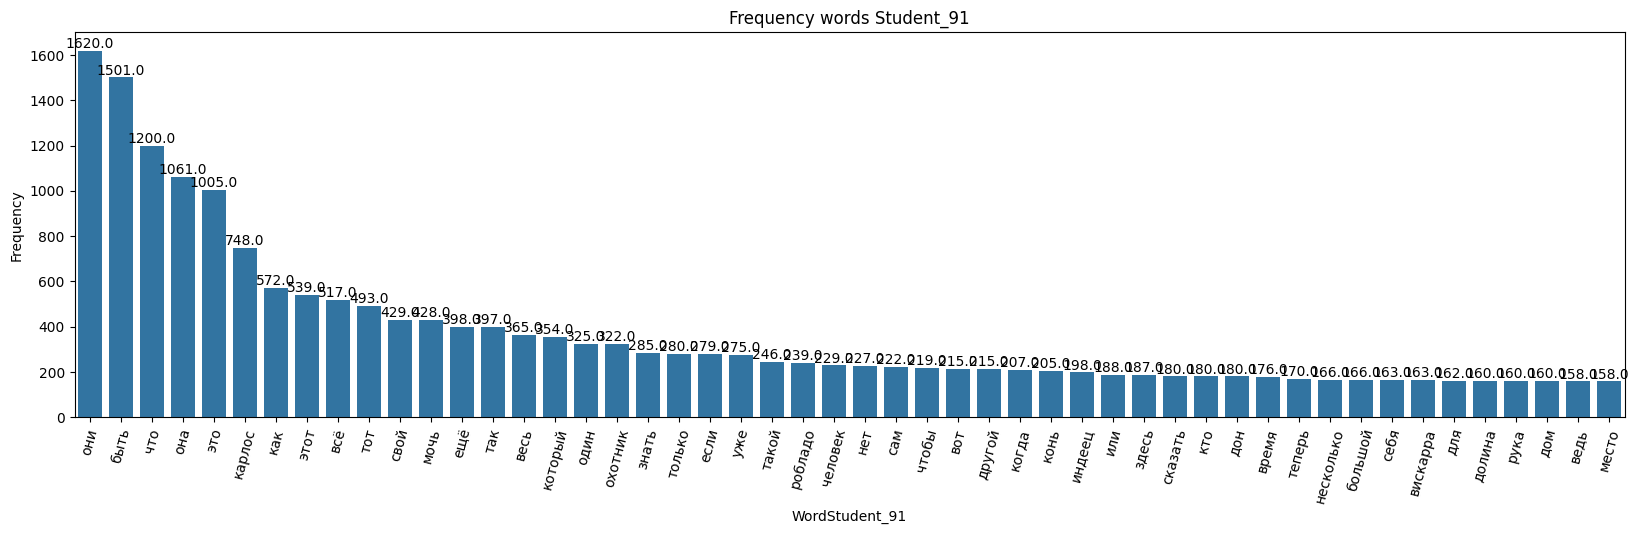

In [106]:
#Plotting the top 5 words by revenue
#setting the figure size
plt.figure(figsize=(20,5))
#creating a bar plot
ax=sns.barplot(x='WordStudent_91',y='Frequency',data=df_student_clear2.head(50))
#rotating the x axis labels
ax.set_xticklabels(labels=df_student_clear2.head(50)['WordStudent_91'],rotation=75)
#setting the title
ax.set_title("Frequency words Student_91")
#setting the Y-axis labels
ax.set_ylabel("Frequency")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

In [107]:
from google.colab import files
with pd.ExcelWriter('outputStudents_1.xlsx') as writer:
    df_student_clear2.to_excel(writer, sheet_name='outputStudent_91')
files.download('outputStudents_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
!ls

 90.txt
 allstudentWords_1.xlsx
 outputStudents_1.xlsx
 Rid_Tomas__Belyi_vochd_www.Litmir.net_68848.txt
'Rid_Tomas__Belyi_vochd_www.Litmir.net_68848.txt to Rid_Tomas__Belyi_vochd_www.Litmir.net_68848.txt'
 sample_data
 stop-words_en.xlsx
 stop_words_en.xlsx
 stop-words-ru.xlsx
 stud1.txt


# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [111]:
!rm Baranenko.xlsx

rm: cannot remove 'Baranenko.xlsx': No such file or directory


In [157]:
from google.colab import files
uploaded = files.upload()

Saving outputTeacherW_Reduce.xlsx to outputTeacherW_Reduce.xlsx


In [158]:
df_teach = pd.read_excel("outputTeacherW_Reduce.xlsx", 'TeacerWords')
# df_teach
# print(df_teach)
print(df_teach.count())

Unnamed: 0       8355
KorpusBosenko    8355
Frequency        8355
dtype: int64


In [160]:
df_stud = pd.read_excel("outputStudents_1.xlsx", 'outputStudent_91')
#print(df_stud)
print(df_stud.count())

Unnamed: 0        8431
WordStudent_91    8431
Frequency         8431
dtype: int64


In [163]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_91.isin(df_teach.KorpusBosenko)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_91':'WordSt_91Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_91'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_91Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

      Unnamed: 0 WordSt_91Tch  FrSt_91
0           8430       ящичек        1
1           4663         ящик        2
2           2131      ящерица        5
3           3071          ято        3
4           1757        ясный        6
...          ...          ...      ...
8350        8020         liii        1
8351        8021          lii        1
8352        8023          iii        1
8353        5496          del        1
8354        2350        coleo        4

[8355 rows x 3 columns]
Unnamed: 0      8355
WordSt_91Tch    8355
FrSt_91         8355
dtype: int64


In [165]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusBosenko.isin(df_stud.WordStudent_91)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusBosenko':'WordSt_91Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_91Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

      Unnamed: 0 WordSt_91Tch  FrTch
0           8354       ящичек      1
1           4587         ящик      2
2           2055      ящерица      5
3           2995          ято      3
4           1682        ясный      6
...          ...          ...    ...
8350        7944         liii      1
8351        7945          lii      1
8352        7947          iii      1
8353        5420          del      1
8354        2274        coleo      4

[8355 rows x 3 columns]
Unnamed: 0      8355
WordSt_91Tch    8355
FrTch           8355
dtype: int64


In [166]:
df_teach_ok_1=df_teach_ok
df_teach_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_teach_ok_1

WordSt_91Tch  FrTch
0             это   1005
1          карлос    748
2             всё    517
3            свой    429
4            мочь    428
...           ...    ...
8350        xxxvi      1
8351       ччерта      1
8352        чьеть      1
8353         xxxv      1
8354       ящичек      1

[8355 rows x 2 columns]

In [167]:
df_student_ok_1=df_student_ok
df_student_ok_1.drop('Unnamed: 0', axis= 1 , inplace= True )
df_student_ok_1

WordSt_91Tch  FrSt_91
0             это     1005
1          карлос      748
2             всё      517
3            свой      429
4            мочь      428
...           ...      ...
8350        xxxvi        1
8351       ччерта        1
8352        чьеть        1
8353         xxxv        1
8354       ящичек        1

[8355 rows x 2 columns]

In [168]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res.head

<bound method NDFrame.head of      WordSt_91Tch  FrTch  FrSt_91
0             это   1005     1005
1          карлос    748      748
2             всё    517      517
3            свой    429      429
4            мочь    428      428
...           ...    ...      ...
8350        xxxvi      1        1
8351       ччерта      1        1
8352        чьеть      1        1
8353         xxxv      1        1
8354       ящичек      1        1

[8355 rows x 3 columns]>

In [169]:
#Объединяем частоты студента и преподавателя
res = df_student_ok.merge(df_teach_ok)
res

WordSt_91Tch  FrSt_91  FrTch
0             это     1005   1005
1          карлос      748    748
2             всё      517    517
3            свой      429    429
4            мочь      428    428
...           ...      ...    ...
8350        xxxvi        1      1
8351       ччерта        1      1
8352        чьеть        1      1
8353         xxxv        1      1
8354       ящичек        1      1

[8355 rows x 3 columns]

In [170]:
from google.colab import files
with pd.ExcelWriter('rezult_1.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult_1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
x=res['WordSt_91Tch'].values.tolist()

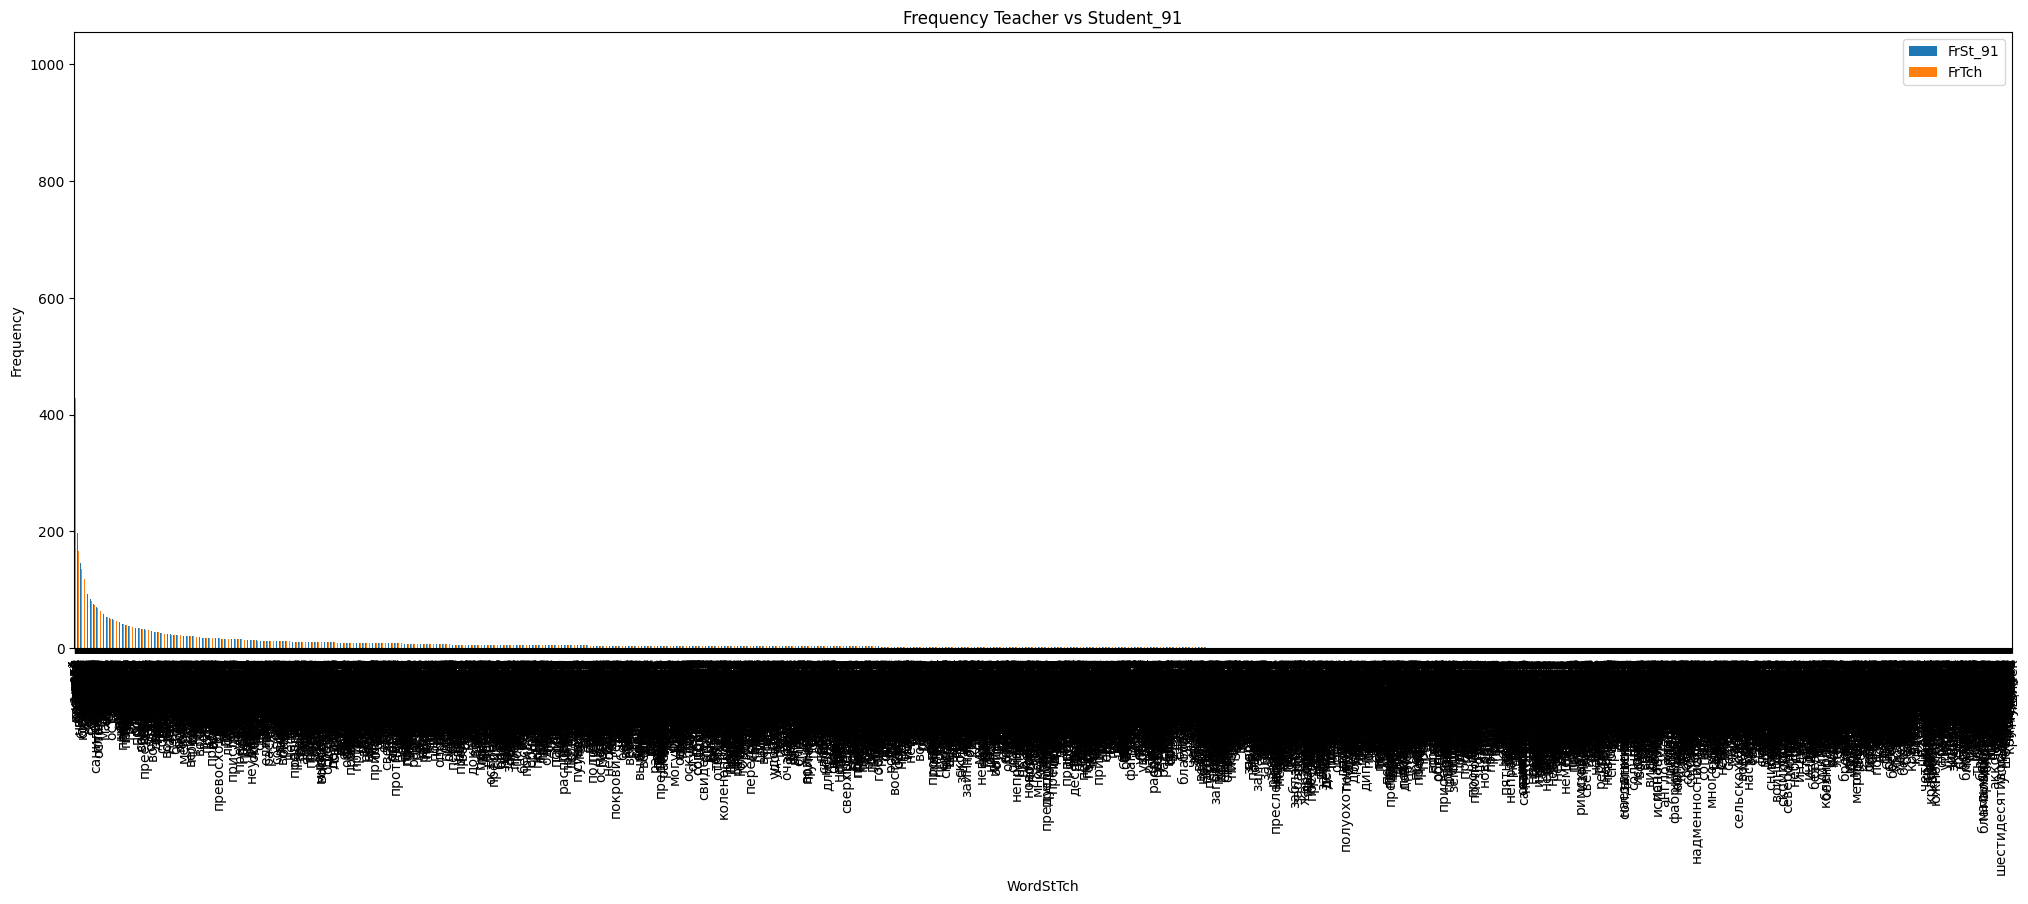

In [172]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_91")
plt.xticks(x_pos, x)
plt.show()

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

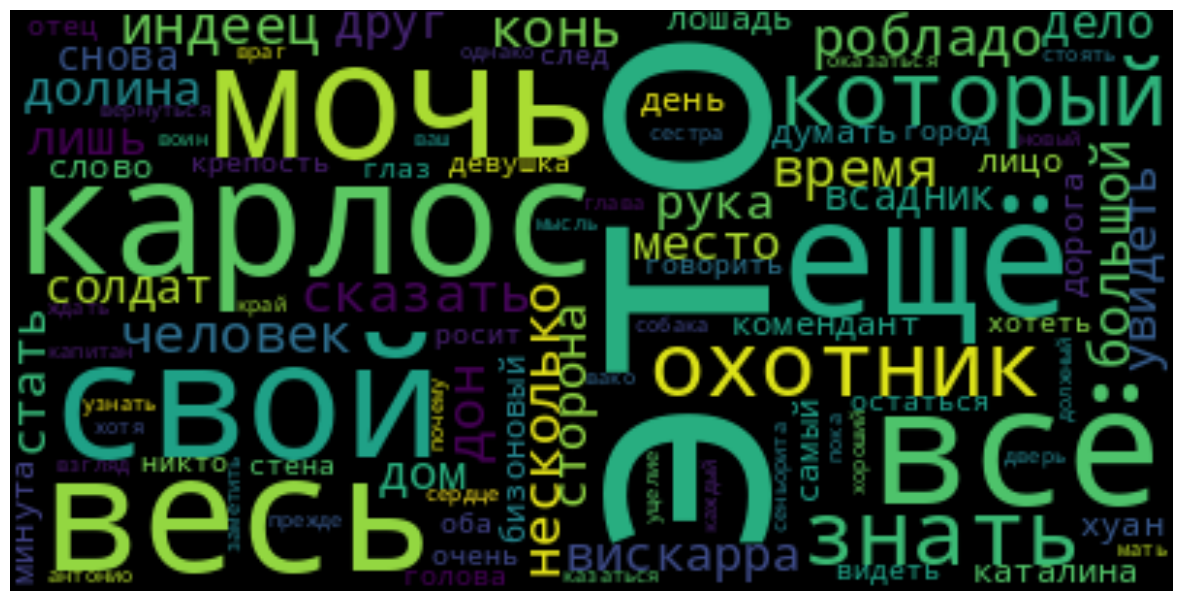

In [174]:
viz=res['WordSt_91Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")